In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generating the dataset
X = np.linspace(0, 2 * np.pi, 100)
Y_sin = np.sin(X)
Y_cos = np.cos(X)


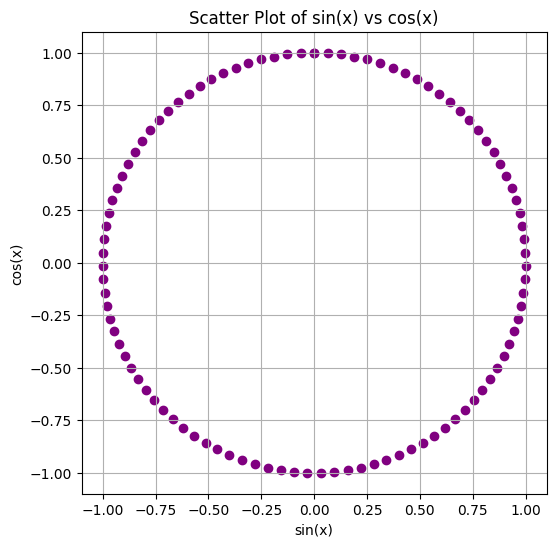

In [3]:
# Creating a scatter plot of Y values only
plt.figure(figsize=(6, 6))
plt.scatter(Y_sin, Y_cos, color='purple')
plt.title('Scatter Plot of sin(x) vs cos(x)')
plt.xlabel('sin(x)')
plt.ylabel('cos(x)')
plt.grid(True)
plt.show()


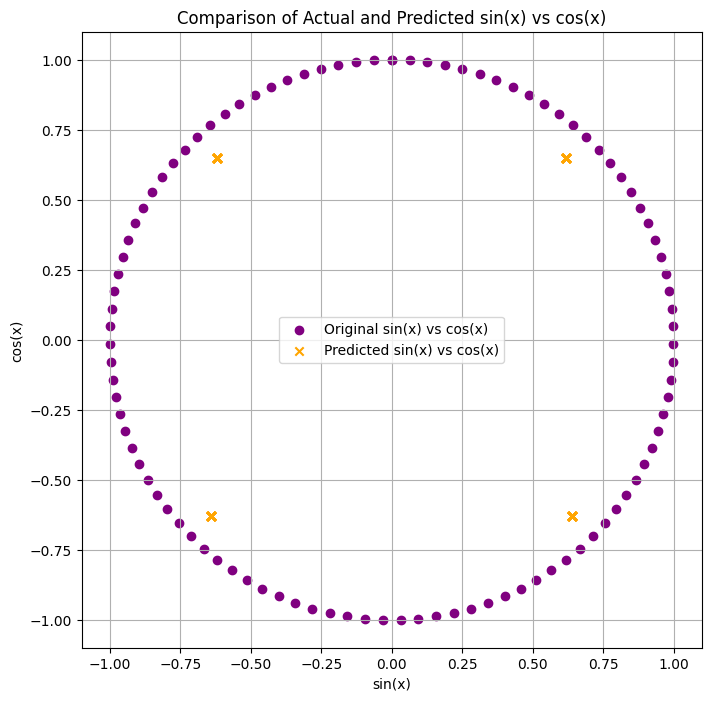

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Function to fit the decision tree
def fit_decision_tree(X, Y, depth):
    X = X.reshape(-1, 1)
    dt_regressor = DecisionTreeRegressor(max_depth=depth)
    dt_regressor.fit(X, Y)
    return dt_regressor

# Generating the data
X = np.linspace(0, 2 * np.pi, 100)
Y = np.column_stack((np.sin(X), np.cos(X)))

# Fitting the model with depth=3
model = fit_decision_tree(X, Y, depth=2)

# Predicting Y values using the fitted model
Y_pred = model.predict(X.reshape(-1, 1))

# Plotting both original and predicted Y values
plt.figure(figsize=(8, 8))
plt.scatter(Y[:, 0], Y[:, 1], color='purple', label='Original sin(x) vs cos(x)')
plt.scatter(Y_pred[:, 0], Y_pred[:, 1], color='orange', marker='x', label='Predicted sin(x) vs cos(x)')
plt.title('Comparison of Actual and Predicted sin(x) vs cos(x)')
plt.xlabel('sin(x)')
plt.ylabel('cos(x)')
plt.legend()
plt.grid(True)
plt.show()



# DecisionTreeFromScratch

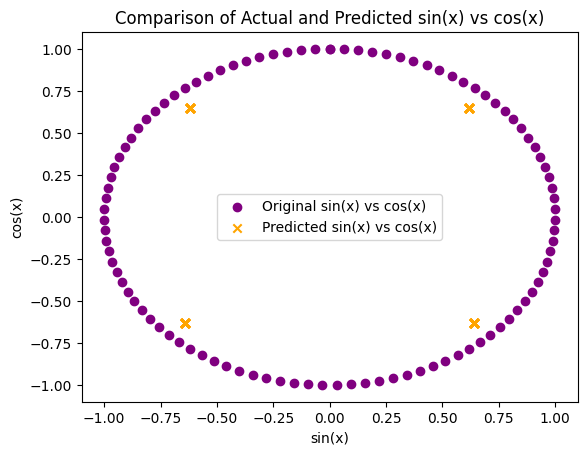

In [50]:
import numpy as np

class DecisionTreeRegressor2137:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    class Node:
        def __init__(self, left, right, feature_index, threshold, value):
            self.left = left
            self.right = right
            self.feature_index = feature_index
            self.threshold = threshold
            self.value = value

    def fit(self, X, Y, depth=0):
        num_samples, num_features = X.shape
        
        # If the dataset is too small or depth equals max depth, create a leaf node
        if num_samples <= 1 or (self.max_depth is not None and depth >= self.max_depth):
            leaf_value = np.mean(Y, axis=0)  # Compute the mean of Y for regression tasks
            return self.Node(None, None, None, None, leaf_value)

        best_mse = float('inf')
        best_split = None

        for feature_index in range(num_features):
            feature_values = X[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            
            for threshold in possible_thresholds:
                left_indices = feature_values < threshold
                right_indices = feature_values >= threshold
                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue

                left_Y = Y[left_indices]
                right_Y = Y[right_indices]

                mse_left = np.mean((left_Y - np.mean(left_Y, axis=0))**2)
                mse_right = np.mean((right_Y - np.mean(right_Y, axis=0))**2)
                mse = (mse_left * np.sum(left_indices) + mse_right * np.sum(right_indices)) / num_samples

                if mse < best_mse:
                    best_mse = mse
                    best_split = (feature_index, threshold, left_indices, right_indices)

        if best_split is None:
            return self.Node(None, None, None, None, np.mean(Y, axis=0))

        feature_index, threshold, left_indices, right_indices = best_split
        left_subtree = self.fit(X[left_indices], Y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], Y[right_indices], depth + 1)

        return self.Node(left_subtree, right_subtree, feature_index, threshold, None)

    def predict(self, X):
        return np.array([self._predict(inputs, self.tree) for inputs in X])

    def _predict(self, inputs, node):
        if node.value is not None:
            return node.value
        if inputs[node.feature_index] < node.threshold:
            return self._predict(inputs, node.left)
        else:
            return self._predict(inputs, node.right)

    def fit_predict(self, X, Y):
        self.tree = self.fit(X, Y)
        return self.predict(X)

# Example usage
X = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
Y = np.column_stack((np.sin(X.ravel()), np.cos(X.ravel())))

tree = DecisionTreeRegressor2137(max_depth=2)
predictions = tree.fit_predict(X, Y)

import matplotlib.pyplot as plt
plt.scatter(Y[:, 0], Y[:, 1], color='purple', label='Original sin(x) vs cos(x)')
plt.scatter(predictions[:, 0], predictions[:, 1], color='orange', marker='x', label='Predicted sin(x) vs cos(x)')
plt.title('Comparison of Actual and Predicted sin(x) vs cos(x)')
plt.xlabel('sin(x)')
plt.ylabel('cos(x)')
plt.legend()
plt.show()


# 3D

In [52]:
import numpy as np
import plotly.graph_objects as go

class DecisionTreeRegressor2138:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    class Node:
        def __init__(self, left, right, feature_index, threshold, value):
            self.left = left
            self.right = right
            self.feature_index = feature_index
            self.threshold = threshold
            self.value = value

    def fit(self, X, Y, depth=0):
        num_samples, num_features = X.shape
        
        if num_samples <= 1 or (self.max_depth is not None and depth >= self.max_depth):
            leaf_value = np.mean(Y, axis=0)
            return self.Node(None, None, None, None, leaf_value)

        best_mse = float('inf')
        best_split = None

        for feature_index in range(num_features):
            feature_values = X[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            
            for threshold in possible_thresholds:
                left_indices = feature_values < threshold
                right_indices = feature_values >= threshold
                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue

                left_Y = Y[left_indices]
                right_Y = Y[right_indices]

                mse_left = np.mean((left_Y - np.mean(left_Y, axis=0))**2)
                mse_right = np.mean((right_Y - np.mean(right_Y, axis=0))**2)
                mse = (mse_left * np.sum(left_indices) + mse_right * np.sum(right_indices)) / num_samples

                if mse < best_mse:
                    best_mse = mse
                    best_split = (feature_index, threshold, left_indices, right_indices)

        if best_split is None:
            return self.Node(None, None, None, None, np.mean(Y, axis=0))

        feature_index, threshold, left_indices, right_indices = best_split
        left_subtree = self.fit(X[left_indices], Y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], Y[right_indices], depth + 1)

        return self.Node(left_subtree, right_subtree, feature_index, threshold, None)

    def predict(self, X):
        return np.array([self._predict(inputs, self.tree) for inputs in X])

    def _predict(self, inputs, node):
        if node.value is not None:
            return node.value
        if inputs[node.feature_index] < node.threshold:
            return self._predict(inputs, node.left)
        else:
            return self._predict(inputs, node.right)



In [57]:
import numpy as np
import plotly.graph_objects as go

# Generate random data
np.random.seed(42)
theta = np.random.uniform(0, 2 * np.pi, 10000)  # Azimuthal angle
phi = np.random.uniform(0, np.pi, 10000)        # Polar angle

X = np.column_stack((theta, phi))
# Convert spherical coordinates to Cartesian coordinates for the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Pack into a 3D array
Y = np.column_stack((x, y, z))


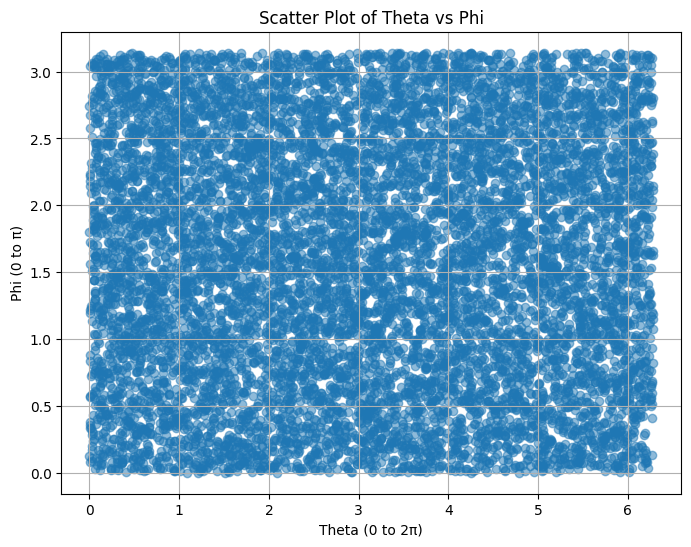

In [58]:
# 2D scatter plot of the X dataset (theta vs phi)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title('Scatter Plot of Theta vs Phi')
plt.xlabel('Theta (0 to 2π)')
plt.ylabel('Phi (0 to π)')
plt.grid(True)
plt.show()

In [59]:

# Visualization using Plotly
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2))])
fig.update_layout(title='Unit Sphere Representation',
                  scene=dict(xaxis=dict(title='X', range=[-1, 1]),
                             yaxis=dict(title='Y', range=[-1, 1]),
                             zaxis=dict(title='Z', range=[-1, 1])))
fig.show()


In [61]:

#Y = np.random.normal(size=(5000, 3))  # Random normals
#Y /= np.linalg.norm(Y, axis=1)[:, np.newaxis]  # Normalize to make it on unit sphere

# Train the model
tree = DecisionTreeRegressor2138(max_depth=3)
tree.tree = tree.fit(X, Y)
predictions = tree.predict(X)

# Plotting
fig = go.Figure()

# Actual sphere data
fig.add_trace(go.Scatter3d(x=Y[:, 0], y=Y[:, 1], z=Y[:, 2], mode='markers', marker=dict(size=2, color='blue'), name='Actual'))

# Predicted data
fig.add_trace(go.Scatter3d(x=predictions[:, 0], y=predictions[:, 1], z=predictions[:, 2], mode='markers', marker=dict(size=12, color='red'), name='Predicted'))

fig.update_layout(title='Actual and Predicted Values on the Unit Sphere', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
fig.show()